# Training Simple Machine Learning Algorithms for Classification
Chapter 2 of Machine Learning of 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


10000


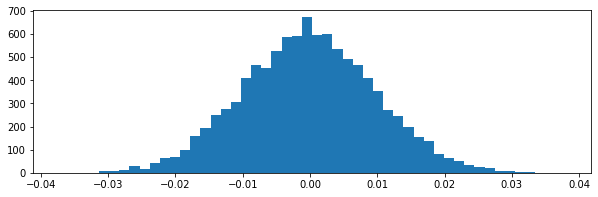

In [25]:
# What is rgen? 
rgen = np.random.RandomState(0)
weights = rgen.normal(loc=0.0, scale=0.01, size=10000)

# Plot Gaussian distribution
print(len(weights))
fig, axes = plt.subplots(1, 1, figsize=(10, 3))

plt.hist(weights, bins=50, axes=axes)
plt.show()

In [68]:
class Perceptron:
    # Single hidden layer perceptron for linearily separable classification
    errors_ = []
    # w_= []
    # b_ = 0
    
    def __init__(self, learning_rate=0.01, n_iter=50, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # X: {array-like}, shape = [n_samples, n_features]
        # y: {array-like}, shape = [n_samples]
        
        # print(X.shape, y.shape)
        
        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0.0)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # print(xi, target)
                update = self.learning_rate * (target - self.predict(xi)) # delta of loss function
                self.weights += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # print(X.shape, self.weights.shape)
        return np.dot(X, self.weights) + self.b_ # z = wTx + b
    
    def predict(self, X): 
        return np.where(self.net_input(X) >= 0.0, 1, 0) # activation function

In [34]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
print(df.columns)
df.head()

# 0 -> Sepal Length
# 1 -> Sepal Width
# 2 -> Petal Length
# 3 -> Petal Width
# 4 -> Class Label (Iris-Setosa, Iris-Versicolor, Iris-Virginica)

Int64Index([0, 1, 2, 3, 4], dtype='int64')


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


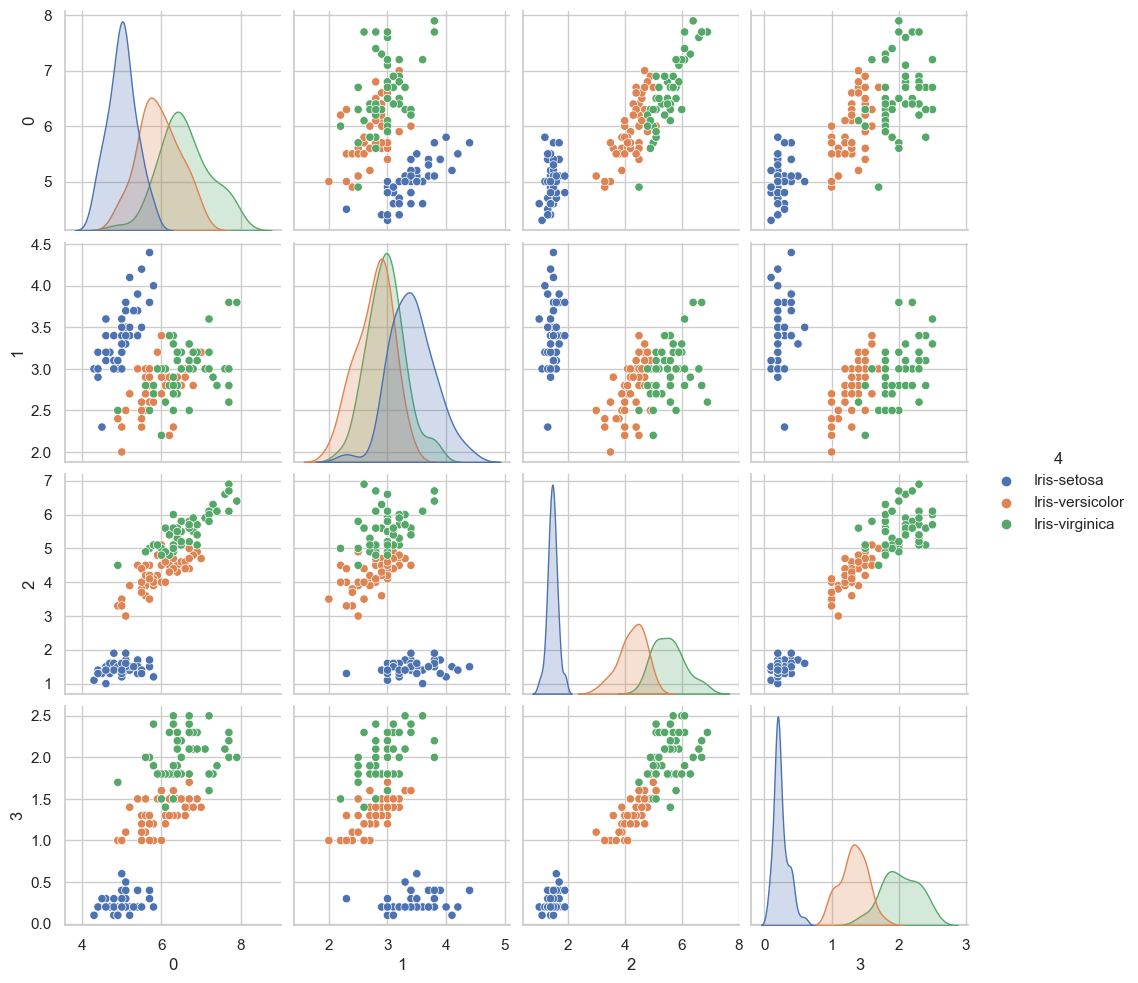

In [16]:
# Pairplot
import seaborn as sns
# sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, hue=4)

(150, 5)


Text(0.5, 1.0, 'Petal Length vs Petal Width')

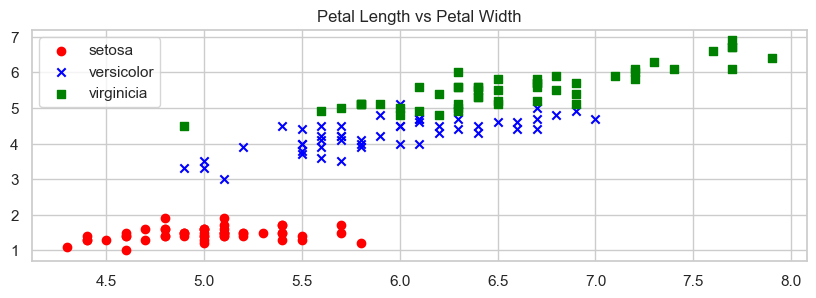

In [23]:
# Let's plot strictly 
# Petal Width vs Petal Length
fig, axes = plt.subplots(1, 1, figsize=(10, 3))
print(df.shape)

setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginicia = df[df[4] == 'Iris-virginica']

plt.scatter(setosa[0], setosa[2], color='red', marker='o', label='setosa')
plt.scatter(versicolor[0], versicolor[2], color='blue', marker='x', label='versicolor')
plt.scatter(virginicia[0], virginicia[2], color='green', marker='s', label='virginicia')
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Length')


(100, 2) (100,)
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]] [0 0 0 0 0]


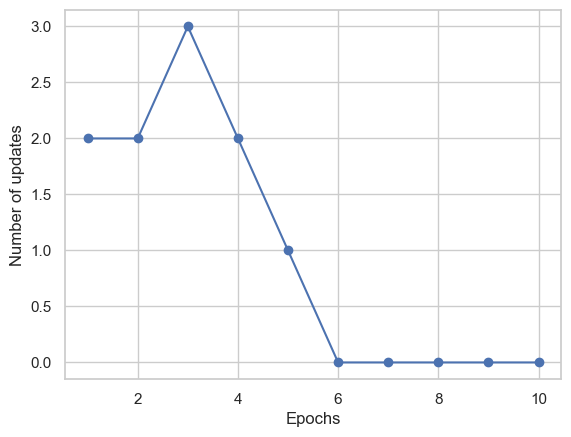

In [69]:
ppn = Perceptron(learning_rate=0.1, n_iter=10)
X = df.iloc[0:100, [0, 2]].values # 0 -> Sepal Length, 2 -> Petal Length
y = df.iloc[0:100, 4].values # 4 -> Class Label (Iris-Setosa, Iris-Versicolor, Iris-Virginica)
y = np.where(y == 'Iris-setosa', 0, 1)

print(X.shape, y.shape)
print(X[0:5], y[0:5])
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

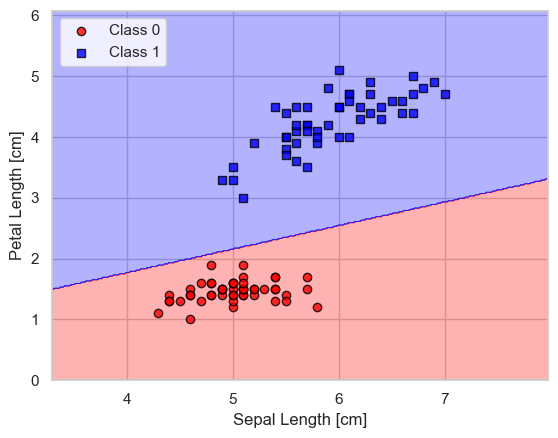

In [105]:
from matplotlib.colors import ListedColormap 

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Sepal Length
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Petal Lengthß
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    lab = lab.reshape(xx1.shape) 
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8, c=colors[idx], 
            marker=markers[idx], 
            label=f'Class {cl}', 
            edgecolor='black'
        )
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

In [134]:
class AdalineGD:
    # Adaptive Linear Neuron Classifier
    def __init__(self, learning_rate=0.01, n_iter=50, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # X: {array-like}, shape = [n_samples, n_features]
        # y: {array-like}, shape = [n_samples]

        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0.0)
        self.cost_ = []
        
        for _ in range(self.n_iter):
            output = self.net_input(X)
            output = self.activation(output)
            errors = (y - output)
            gradient = X.T.dot(errors) / X.shape[0] # Take average
            # print(gradient.shape, errors.shape, X.shape)
            self.weights += self.learning_rate * 2.0 * gradient
            self.b_ += self.learning_rate * 2.0 * errors.mean()
            cost = (errors**2).sum() 
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        # z = wTx + b
        return np.dot(X, self.weights) + self.b_
    
    def activation(self, X):
        # Linear activation
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    

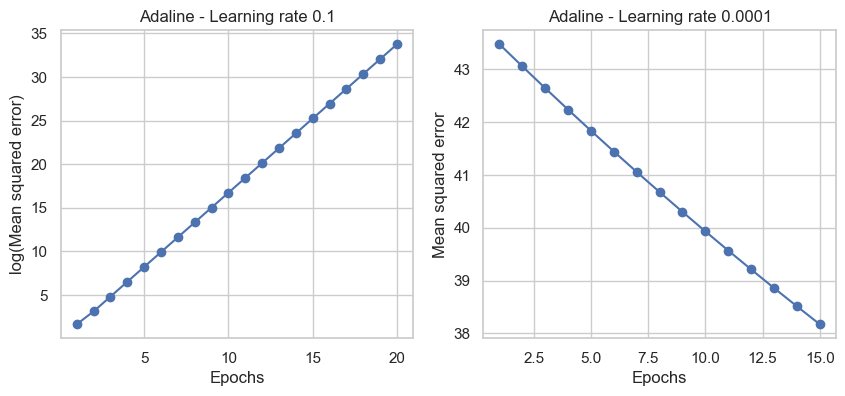

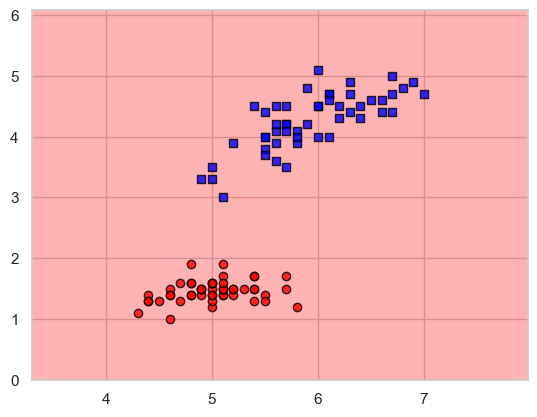

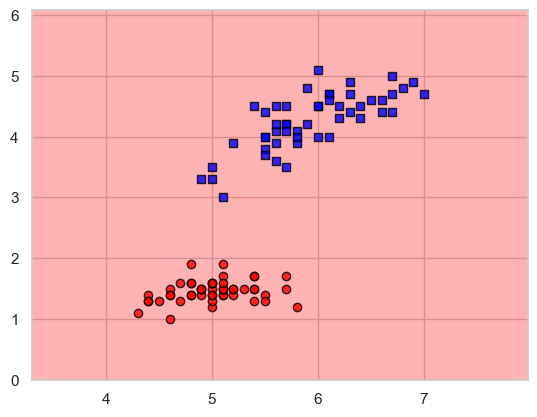

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=20, learning_rate=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, learning_rate=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001') 
plt.show()
plot_decision_regions(X, y, classifier=ada1)
plt.show()
plot_decision_regions(X, y, classifier=ada2)
plt.show()


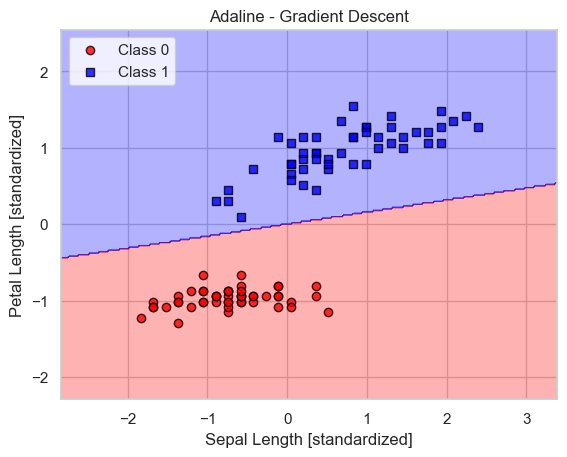

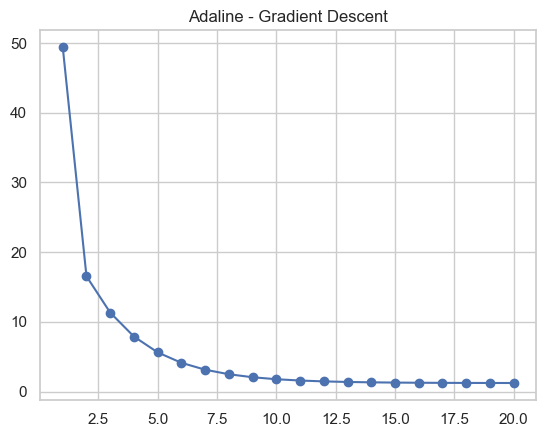

In [136]:
# Standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std() # Sepal Length
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std() # Petal Length
ada_gd = AdalineGD(n_iter=20, learning_rate=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.title('Adaline - Gradient Descent')
plt.show()